# **Fuzzy Inference - Choke Adjustment II**

In [1]:
!pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 5.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=01f7881f7eb6a65425ed95e671364c38c53feda7f9365ba25a948718ee885b55
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


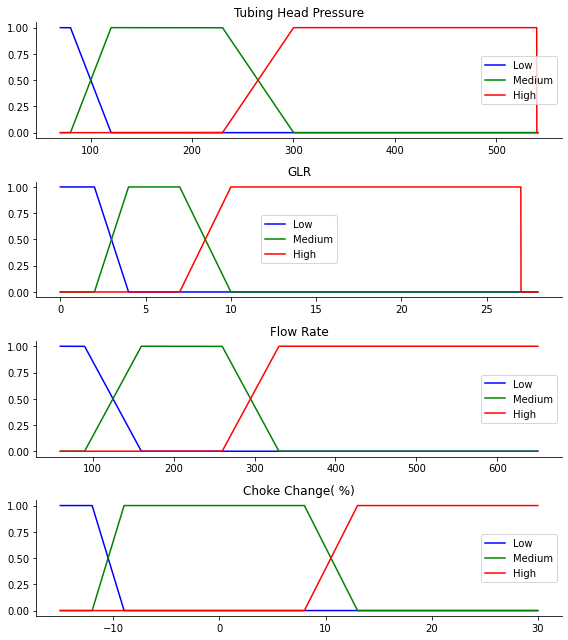

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
# Define universe variables
# Tubing Head pressure (x_THP) values range from 70 to 540 psi
# Gas Liquid ratio (x_GLR) values range from 0 to 27 Mscf/bbl
# Oil production rate (x_q) values range from 60 to 649 bbl/day
# Choke Adjustment values (x_choke) range from -15 to 30 percentage
#change
x_THP=np.arange(70, 541, 0.01)
x_GLR=np.arange(0, 28, 0.01)
x_q=np.arange(60, 650, 0.01)
x_choke=np.arange(-15, 30, 0.01)
# Create trapezoidal fuzzy membership functions for low, medium, and 
#high linguistic variables.
THP_low=fuzz.trapmf(x_THP, [70, 70, 80, 120])
THP_med=fuzz.trapmf(x_THP, [80, 120, 230, 300])
THP_hi=fuzz.trapmf(x_THP, [230, 300, 540, 540])
GLR_low=fuzz.trapmf(x_GLR, [0, 0, 2, 4])
GLR_med=fuzz.trapmf(x_GLR, [2, 4, 7, 10])
GLR_hi=fuzz.trapmf(x_GLR, [7, 10, 27, 27])
q_low=fuzz.trapmf(x_q,[60, 60, 90, 160])
q_med=fuzz.trapmf(x_q, [90, 160, 260, 330])
q_hi=fuzz.trapmf(x_q, [260, 330, 650, 650])
choke_increase=fuzz.trapmf(x_choke,[-15, -15, -12,-9])
choke_fixed=fuzz.trapmf(x_choke, [-12, -9, 8,13])
choke_decrease=fuzz.trapmf(x_choke, [8,13, 30,30])
# Plot value ranges and the trapezoidal membership functions
fig, (ax0, ax1, ax2,ax3)=plt.subplots(nrows=4, figsize=(8, 9))
ax0.plot(x_THP, THP_low, 'b', linewidth=1.5, label='Low')
ax0.plot(x_THP, THP_med, 'g', linewidth=1.5, label='Medium')
ax0.plot(x_THP, THP_hi, 'r', linewidth=1.5, label='High')
ax0.set_title('Tubing Head Pressure')
ax0.legend()
ax1.plot(x_GLR, GLR_low, 'b', linewidth=1.5, label='Low') 

ax1.plot(x_GLR, GLR_med, 'g', linewidth=1.5, label='Medium')
ax1.plot(x_GLR, GLR_hi, 'r', linewidth=1.5, label='High')
ax1.set_title('GLR') 
ax1.legend()
ax2.plot(x_q, q_low, 'b', linewidth=1.5, label='Low')
ax2.plot(x_q, q_med, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_q, q_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Flow Rate')
ax2.legend()
ax3.plot(x_choke, choke_increase, 'b', linewidth=1.5, label='Low')
ax3.plot(x_choke, choke_fixed, 'g', linewidth=1.5, label='Medium')
ax3.plot(x_choke, choke_decrease, 'r', linewidth=1.5, label='High')
ax3.set_title('Choke Change( %)') 
ax3.legend()
# Not Showing top and right axes
for ax in (ax0, ax1, ax2,ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()

In [3]:
# Fuzzification of THP 265 psi, GLR 20 mscf/day and q 300 bbl/day
THP_mem_lo=fuzz.interp_membership(x_THP, THP_low, 265)
THP_mem_med=fuzz.interp_membership(x_THP, THP_med, 265)
THP_mem_hi=fuzz.interp_membership(x_THP, THP_hi, 265)
GLR_mem_lo=fuzz.interp_membership(x_GLR, GLR_low, 20)
GLR_mem_med=fuzz.interp_membership(x_GLR, GLR_med, 20)
GLR_mem_hi=fuzz.interp_membership(x_GLR, GLR_hi, 20)
q_mem_lo=fuzz.interp_membership(x_q, q_low, 300)
q_mem_med=fuzz.interp_membership(x_q,q_med, 300)
q_mem_hi=fuzz.interp_membership(x_q, q_hi, 300)

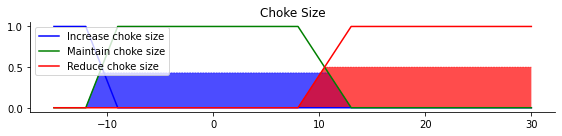

In [4]:
# Firing strength calculation for Rule 6
# if THP is medium AND GLR is high AND q is medium THEN Choke Medium
active_rule6=np.amin([THP_mem_med, GLR_mem_hi, q_mem_med])
choke_activation_6=np.fmin(active_rule6, choke_fixed)
# Firing strength calculation for Rule 9
# if THP is high AND GLR is high AND q is high THEN Reduce high Choke
active_rule9=np.amin([THP_mem_hi, GLR_mem_hi, q_mem_hi])
choke_activation_9=np.fmin(active_rule9, choke_decrease)
choke0=np.zeros_like(x_choke)
#Plot Membership functions for rules
fig, ax0=plt.subplots(figsize=(8, 2))
ax0.fill_between(x_choke, choke0, choke_activation_6, facecolor='b',
alpha=0.7)
ax0.plot(x_choke, choke_activation_6, 'b', linewidth=0.5,
linestyle='--')
ax0.fill_between(x_choke, choke0, choke_activation_9, 
facecolor='r', alpha=0.7)
ax0.plot(x_choke, choke_activation_9, 'r', linewidth=0.5,
linestyle='--')
ax0.set_title('Output membership activity')
ax0.plot(x_choke, choke_increase, 'b', linewidth=1.5, label='Increase choke size')
ax0.plot(x_choke, choke_fixed, 'g', linewidth=1.5, label='Maintain choke size')
ax0.plot(x_choke, choke_decrease, 'r', linewidth=1.5, label='Reduce choke size')
ax0.set_title('Choke Size') 
ax0.legend()
# Not Showing top and right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()
# Aggregate two output membership functions or firing strengths
#together
aggregated=np.fmax(choke_activation_6, choke_activation_9)

10.111105475700729


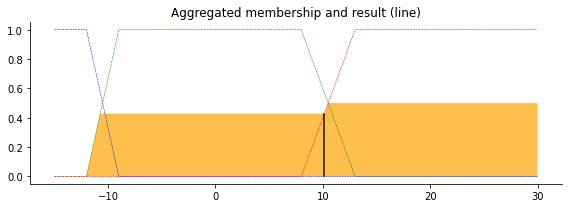

In [5]:
# compute defuzzified result using center of gravity
choke=fuzz.defuzz(x_choke, aggregated, 'centroid')
choke_activation=fuzz.interp_membership(x_choke, aggregated, choke)
# Plot the results
fig, ax0=plt.subplots(figsize=(8, 3))
ax0.plot(x_choke,choke_increase,'b',linewidth=0.5,linestyle='--')
ax0.plot(x_choke, choke_fixed, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_choke, choke_decrease, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_choke, choke0, aggregated, facecolor='Orange',
alpha=0.7)
ax0.plot([choke, choke], [0, choke_activation], 'k', linewidth=1.5,
alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')
# Not Showing top and right axes
for ax in (ax0,):
     ax.spines['top'].set_visible(False)
     ax.spines['right'].set_visible(False)
     ax.get_xaxis().tick_bottom()
     ax.get_yaxis().tick_left()
plt.tight_layout()
print (choke)